## Descripción del proyecto
Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.
Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018.

### Tabla de contenido
 
 1. Información general
 2. Preparar los datos
 3. Analizar los datos
 4. Probar las hipótesis
 5. Entregar la conclusión general

## Información general

In [1]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import levene
import missingno as msno

In [2]:
# Carga de archivos 
try:
    calls = pd.read_csv("megaline_calls.csv")
    inet = pd.read_csv("megaline_internet.csv")
    mess = pd.read_csv("megaline_messages.csv")
    plans = pd.read_csv("megaline_plans.csv")
    users = pd.read_csv("megaline_users.csv")

except:
    calls = pd.read_csv("/datasets/megaline_calls.csv")
    inet = pd.read_csv("/datasets/megaline_internet.csv")
    mess = pd.read_csv("/datasets/megaline_messages.csv")
    plans = pd.read_csv("/datasets/megaline_plans.csv")
    users = pd.read_csv("/datasets/megaline_users.csv")

In [3]:
# Revisión de archivo users
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [4]:
print(users.info())
print('-----------------------------------------------------------------------------------')
print(users.describe())
print('-----------------------------------------------------------------------------------')
print('Datos duplicados',users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
-----------------------------------------------------------------------------------
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000
-----------------------------------------------------------------------------

In [5]:
# Revisión de archivo internet
inet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [6]:
print(inet.info())
print('--------------------------------------------------------------------------------------------')
print(inet.describe())
print('--------------------------------------------------------------------------------------------')
print('Datos duplicados',inet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
--------------------------------------------------------------------------------------------
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000
--------------------------------------------------------------------------------------------
Datos duplicados 0


In [7]:
# Revisión de archivo messages
mess

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [8]:
print(mess.info())
print('--------------------------------------------------------------------------------------------')
print(mess.describe())
print('--------------------------------------------------------------------------------------------')
print('Datos duplicados',mess.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
--------------------------------------------------------------------------------------------
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000
--------------------------------------------------------------------------------------------
Datos duplicados 0


In [9]:
# Revisión de archivo plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
print(plans.info())
print('--------------------------------------------------------------------------------------------')
print(plans.describe())
print('--------------------------------------------------------------------------------------------')
print('Datos duplicados',plans.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
--------------------------------------------------------------------------------------------
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std     

In [11]:
# Revisión de archivo calls
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [12]:
print(calls.info())
print('--------------------------------------------------------------------------------------------')
print(calls.describe())
print('--------------------------------------------------------------------------------------------')
print('Datos duplicados',calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
--------------------------------------------------------------------------------------------
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000
--------------------------------------------------------------------------------------------
Datos duplicados 0


## Conclusión información general

En nuestra primera revisión nos percatamos que la base de datos de usuarios presenta datos nulos en la columna `churn_date` y error de formato en la columna `reg_date`.Para la base de datos de internet, mensajes y llamadas también presenta error de formato en la columnas relacionadas a fecha, Por último señalar que ninguna base de datos presenta datos duplicados.

## Preparar los datos

### Preparar archivos users

In [13]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [14]:
# Cambiar tipo a columna reg_date y churn_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [15]:
# Cambiar nombre de columnas reg_date y churn_date
users.columns = ['user_id', 'first_name', 'last_name', 'age', 'city', 'subscription_date', 'plan_name', 'stop_date']

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            500 non-null    int64         
 1   first_name         500 non-null    object        
 2   last_name          500 non-null    object        
 3   age                500 non-null    int64         
 4   city               500 non-null    object        
 5   subscription_date  500 non-null    datetime64[ns]
 6   plan_name          500 non-null    object        
 7   stop_date          34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [17]:
# Crear tabla de nulos 
nan_rows = users[users.isnull().any(1)]
nan_rows

,user_id,first_name,last_name,age,city,subscription_date,plan_name,stop_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


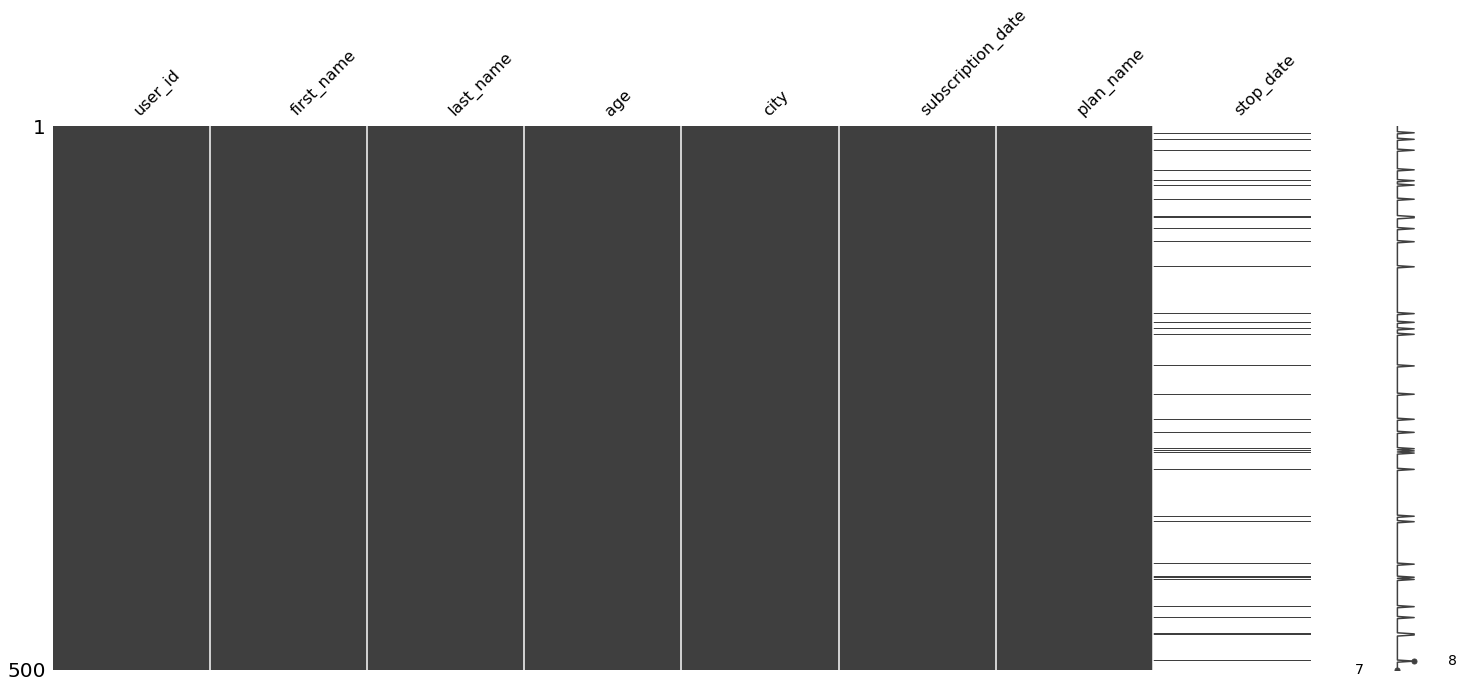

In [91]:
msno.matrix(users)

In [92]:
# Ver el porcentaje de nulos
df_null = users.isna()
df_null.mean() * 100

user_id               0.0
first_name            0.0
last_name             0.0
age                   0.0
city                  0.0
subscription_date     0.0
plan_name             0.0
stop_date            93.2
dtype: float64

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            500 non-null    int64         
 1   first_name         500 non-null    object        
 2   last_name          500 non-null    object        
 3   age                500 non-null    int64         
 4   city               500 non-null    object        
 5   subscription_date  500 non-null    datetime64[ns]
 6   plan_name          500 non-null    object        
 7   stop_date          34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Conclusión 

Se transforma al formato correcto la columnas con error de formato (fecha) y se cambia los nombres para una mejor comprensión futura. Además se descubre que los datos nulos de la columna `churn_date` equivalen al 93.2% de la columna y se decide imputar por la fecha limite del proyecto es decir 31-12-2018.

### Preparar archivos internet

In [19]:
inet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [20]:
# Cambiar tipo de columna session_date
inet['session_date'] = pd.to_datetime(inet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
# Agregamos columnas de mes 
inet['month'] = inet['session_date'].dt.month_name()

In [21]:
inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ MB


In [22]:
inet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [23]:
inet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


### Conclusión

Para esta base de dato se cambia formato en la columna `session_date` y se agrega la columna `month` para visualizar los meses del análisis.

### Preparar archivos messages

In [87]:
mess

,id_mess,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December
...,...,...,...,...
76046,1497_526,1497,2018-12-24,December
76047,1497_536,1497,2018-12-24,December
76048,1497_547,1497,2018-12-31,December
76049,1497_558,1497,2018-12-24,December


In [88]:
# Cambiar tipo de columna message_date
mess['message_date'] = pd.to_datetime(mess['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
# Agregamos columnas de mes 
mess['month'] = mess['message_date'].dt.month_name()
# cambiamos nombre de las columnas para no confundir
mess.columns = ['id_mess','user_id','message_date','month']

In [89]:
mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_mess       76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


In [90]:
mess.head()

,id_mess,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


### Conclusión

Para esta base de datos cambiamos tipo de formato en la columna `message_date` agregamos la columna `month` y cambiamos el nombre de la columna `id` para evitar futuros problemas con las uniones.

### Preparar archivos plans

In [28]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [29]:
# Tabla temporal para saber cantidad de usuarios por plan
plan_user = users.merge(plans)
plan_user

,user_id,first_name,last_name,age,city,subscription_date,plan_name,stop_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT,50,15360,500,20,10,0.03,0.03
496,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,50,15360,500,20,10,0.03,0.03
497,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,50,15360,500,20,10,0.03,0.03
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,50,15360,500,20,10,0.03,0.03


In [30]:
# Cantidad de usuarios por plan
plan_user['plan_name'].value_counts()

surf        339
ultimate    161
Name: plan_name, dtype: int64

### Conclusión

La base de datos plans no presenta ningún tipo de error en su primer análisis por ende no se modifica nada.


### Preparar archivos calls

In [31]:
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [32]:
# Cambiar tipo de columna call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
# Agregamos columnas de mes 
calls['month'] = calls['call_date'].dt.month_name()

In [33]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB


In [34]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [35]:
calls['duration'].value_counts()

0.00     26834
4.02       102
8.37       102
3.91       101
4.30       100
         ...  
31.55        1
24.95        1
26.23        1
29.56        1
25.18        1
Name: duration, Length: 2802, dtype: int64

In [36]:
# código para redondear cifras
calls['duration'] = np.ceil(calls['duration'])

In [37]:
calls['duration'] = calls['duration'].astype('int')

In [38]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.3+ MB


### Conclusión

Para esta base de datos se cambia el formato de la columna `call_date` se agrega la columna `month` y se redondean los valores de la columna `duration`.

## Preparación de datos para calculos

In [39]:
# Cantidad de sms enviados por mes de cada usuario
sms_per_month = mess.groupby(['user_id', 'month'])['id_mess'].count()
sms_per_month

user_id  month    
1000     December     11
1001     August       30
         December     44
         November     36
         October      53
                      ..
1496     December     11
         November     13
         October      18
         September    21
1497     December     50
Name: id_mess, Length: 1806, dtype: int64

In [40]:
# El volumen de datos por usuario cada mes.
inet_per_month = inet.groupby(['user_id','month'])['mb_used'].sum()
inet_per_month

user_id  month    
1000     December      1901.47
1001     August        6919.15
         December     19369.18
         November     18504.30
         October      22330.49
                        ...   
1498     September    22827.28
1499     December     22059.21
         November     16813.83
         October      19492.43
         September    12984.76
Name: mb_used, Length: 2277, dtype: float64

In [41]:
# El número de llamadas realizadas por usuario cada mes
calls_per_month = calls.groupby(['user_id','month'])['id'].count()
calls_per_month

user_id  month    
1000     December     16
1001     August       27
         December     56
         November     64
         October      65
                      ..
1498     September    45
1499     December     65
         November     45
         October      53
         September    41
Name: id, Length: 2258, dtype: int64

In [42]:
# Minutos utilizados por usuario cada mes
mins_per_month = calls.groupby(['user_id','month'])['duration'].sum()
mins_per_month

user_id  month    
1000     December     124
1001     August       182
         December     412
         November     426
         October      393
                     ... 
1498     September    363
1499     December     496
         November     308
         October      385
         September    346
Name: duration, Length: 2258, dtype: int64

## Incorporación de calculos como columnas para el posterior análisis.

In [43]:
new_df = pd.concat([calls_per_month, mins_per_month, sms_per_month, inet_per_month], axis=1).reset_index().fillna(0)
new_df.columns = ['user_id', 'month', 'calls_made', 'call_duration', 'messages_sent', 'mb_used']
new_df = new_df.merge(users, on='user_id')
new_df

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,subscription_date,plan_name,stop_date
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,August,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,December,56.0,412.0,44.0,19369.18,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,November,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,October,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,September,45.0,363.0,0.0,22827.28,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
2289,1499,December,65.0,496.0,0.0,22059.21,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2290,1499,November,45.0,308.0,0.0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2291,1499,October,53.0,385.0,0.0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT


In [44]:
new_df = new_df.merge(plans, left_on='plan_name', right_on='plan_name')
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,subscription_date,plan_name,stop_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
2,1006,November,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
3,1008,December,85.0,634.0,26.0,14689.33,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
4,1008,November,63.0,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01


In [45]:
# Codigo para redondear a gbytes
new_df['gb_used'] = (new_df['mb_used'] / 1024).apply(np.ceil)

In [46]:
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,plan_name,stop_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,2.0
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,32.0
2,1006,November,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,3.0
3,1008,December,85.0,634.0,26.0,14689.33,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,15.0
4,1008,November,63.0,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,24.0


In [47]:
# Creamos columna gb_per_month _included
new_df['gb_per_month_included'] = np.ceil(new_df['mb_per_month_included'] / 1024)

In [48]:
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,stop_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_per_month_included
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,2.0,30.0
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,32.0,30.0
2,1006,November,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,3.0,30.0
3,1008,December,85.0,634.0,26.0,14689.33,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,15.0,30.0
4,1008,November,63.0,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,24.0,30.0


In [49]:
# agrega el cargo mensual según la tarifa de llamadas
new_df['message_cost'] = new_df.apply(lambda x: max(0, x['messages_sent'] - x['messages_included']) * x['usd_per_message'], 
                                      axis = 1)
new_df['call_cost'] = new_df.apply(lambda x: max(0, x['call_duration'] - x['minutes_included']) * x['usd_per_minute'], 
                                   axis = 1)
new_df['gb_cost'] = new_df.apply(lambda x: max(0, x['gb_used'] - x['gb_per_month_included']) * x['usd_per_gb'], 
                                axis = 1)
new_df['revenue'] =new_df['message_cost'] + new_df['call_cost'] + new_df['gb_cost'] + new_df['usd_monthly_pay']
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_per_month_included,message_cost,call_cost,gb_cost,revenue
0,1000,December,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,70,7,0.01,0.01,2.0,30.0,0.0,0.0,0.0,70.0
1,1006,December,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,70,7,0.01,0.01,32.0,30.0,0.0,0.0,14.0,84.0
2,1006,November,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,70,7,0.01,0.01,3.0,30.0,0.0,0.0,0.0,70.0
3,1008,December,85.0,634.0,26.0,14689.33,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,70,7,0.01,0.01,15.0,30.0,0.0,0.0,0.0,70.0
4,1008,November,63.0,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,70,7,0.01,0.01,24.0,30.0,0.0,0.0,0.0,70.0


In [50]:
# reorganizar las columnas para el análisis
df_final = new_df[['user_id', 'first_name', 'last_name', 'plan_name','month',
                   'calls_made','call_duration','minutes_included','usd_per_minute','call_cost',
                   'messages_sent','messages_included','usd_per_message','message_cost',
                   'gb_used','gb_per_month_included','usd_per_gb','gb_cost','usd_monthly_pay','revenue']]

In [51]:
df_final

,user_id,first_name,last_name,plan_name,month,calls_made,call_duration,minutes_included,usd_per_minute,call_cost,messages_sent,messages_included,usd_per_message,message_cost,gb_used,gb_per_month_included,usd_per_gb,gb_cost,usd_monthly_pay,revenue
0,1000,Anamaria,Bauer,ultimate,December,16.0,124.0,3000,0.01,0.0,11.0,1000,0.01,0.0,2.0,30.0,7,0.0,70,70.0
1,1006,Jesusa,Bradford,ultimate,December,9.0,59.0,3000,0.01,0.0,139.0,1000,0.01,0.0,32.0,30.0,7,14.0,70,84.0
2,1006,Jesusa,Bradford,ultimate,November,2.0,10.0,3000,0.01,0.0,15.0,1000,0.01,0.0,3.0,30.0,7,0.0,70,70.0
3,1008,Emely,Hoffman,ultimate,December,85.0,634.0,3000,0.01,0.0,26.0,1000,0.01,0.0,15.0,30.0,7,0.0,70,70.0
4,1008,Emely,Hoffman,ultimate,November,63.0,446.0,3000,0.01,0.0,37.0,1000,0.01,0.0,24.0,30.0,7,0.0,70,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Scot,Williamson,surf,September,45.0,363.0,500,0.03,0.0,0.0,50,0.03,0.0,23.0,15.0,10,80.0,20,100.0
2289,1499,Shena,Dickson,surf,December,65.0,496.0,500,0.03,0.0,0.0,50,0.03,0.0,22.0,15.0,10,70.0,20,90.0
2290,1499,Shena,Dickson,surf,November,45.0,308.0,500,0.03,0.0,0.0,50,0.03,0.0,17.0,15.0,10,20.0,20,40.0
2291,1499,Shena,Dickson,surf,October,53.0,385.0,500,0.03,0.0,0.0,50,0.03,0.0,20.0,15.0,10,50.0,20,70.0


In [52]:
df_final = df_final.copy()

In [53]:
df_final['calls_made'] = df_final['calls_made'].astype('int64')
df_final['messages_sent'] = df_final['messages_sent'].astype('int64')
df_final['gb_used'] = df_final['gb_used'].astype('int64')

In [54]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   first_name             2293 non-null   object 
 2   last_name              2293 non-null   object 
 3   plan_name              2293 non-null   object 
 4   month                  2293 non-null   object 
 5   calls_made             2293 non-null   int64  
 6   call_duration          2293 non-null   float64
 7   minutes_included       2293 non-null   int64  
 8   usd_per_minute         2293 non-null   float64
 9   call_cost              2293 non-null   float64
 10  messages_sent          2293 non-null   int64  
 11  messages_included      2293 non-null   int64  
 12  usd_per_message        2293 non-null   float64
 13  message_cost           2293 non-null   float64
 14  gb_used                2293 non-null   int64  
 15  gb_p

In [55]:
df_final.head()

,user_id,first_name,last_name,plan_name,month,calls_made,call_duration,minutes_included,usd_per_minute,call_cost,messages_sent,messages_included,usd_per_message,message_cost,gb_used,gb_per_month_included,usd_per_gb,gb_cost,usd_monthly_pay,revenue
0,1000,Anamaria,Bauer,ultimate,December,16,124.0,3000,0.01,0.0,11,1000,0.01,0.0,2,30.0,7,0.0,70,70.0
1,1006,Jesusa,Bradford,ultimate,December,9,59.0,3000,0.01,0.0,139,1000,0.01,0.0,32,30.0,7,14.0,70,84.0
2,1006,Jesusa,Bradford,ultimate,November,2,10.0,3000,0.01,0.0,15,1000,0.01,0.0,3,30.0,7,0.0,70,70.0
3,1008,Emely,Hoffman,ultimate,December,85,634.0,3000,0.01,0.0,26,1000,0.01,0.0,15,30.0,7,0.0,70,70.0
4,1008,Emely,Hoffman,ultimate,November,63,446.0,3000,0.01,0.0,37,1000,0.01,0.0,24,30.0,7,0.0,70,70.0


In [56]:
# Consultamos para corroborar
df_final.query('user_id == 1001')

,user_id,first_name,last_name,plan_name,month,calls_made,call_duration,minutes_included,usd_per_minute,call_cost,messages_sent,messages_included,usd_per_message,message_cost,gb_used,gb_per_month_included,usd_per_gb,gb_cost,usd_monthly_pay,revenue
720,1001,Mickey,Wilkerson,surf,August,27,182.0,500,0.03,0.0,30,50,0.03,0.00,7,15.0,10,0.0,20,20.00
721,1001,Mickey,Wilkerson,surf,December,56,412.0,500,0.03,0.0,44,50,0.03,0.00,19,15.0,10,40.0,20,60.00
722,1001,Mickey,Wilkerson,surf,November,64,426.0,500,0.03,0.0,36,50,0.03,0.00,19,15.0,10,40.0,20,60.00
723,1001,Mickey,Wilkerson,surf,October,65,393.0,500,0.03,0.0,53,50,0.03,0.09,22,15.0,10,70.0,20,90.09
724,1001,Mickey,Wilkerson,surf,September,49,315.0,500,0.03,0.0,44,50,0.03,0.00,14,15.0,10,0.0,20,20.00


# Conclusión

En esta etapa del proyecto se manipularon las distintas columnas para dejar una tabla limpia para el análisis, se respondieron las preguntas planteadas por el proyecto, se redondearon las cifras por petición de la empresa y se crearon columnas nuevas que ayudaran a entender el comportamiento asi como también cuanto gasta cada usuario en su plan.

## Analizar los datos

In [57]:
# Describir el comportamiento de los clientes.
ultimate_data = df_final.query("plan_name == 'ultimate'")
ultimate_plan = ultimate_data[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'revenue']]
ultimate_plan.describe()

,calls_made,call_duration,messages_sent,gb_used,revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,60.626389,430.450000,37.551389,17.306944,72.313889
std,33.242994,240.508762,34.767179,7.670108,11.395108
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,260.000000,7.000000,13.000000,70.000000
50%,61.000000,424.000000,30.000000,17.000000,70.000000
75%,80.000000,565.250000,61.000000,21.000000,70.000000
max,191.000000,1369.000000,166.000000,46.000000,182.000000


## Conclusión plan ultimate

Para los clientes que cuentan con el plan ultimate existe un promedio 61 llamadas realizadas al mes, un promedio de minutos usados al mes de 424 minutos. un promedio de 30 mensajes enviados mensualmente y 17 Gb de uso promedio mensual. En un plano general ningún cliente llega al limite de sus datos. excepto un grupo que se excede en gb usados mensualmente.

In [58]:
surf_data = df_final.query("plan_name == 'surf'")
surf_plan = surf_data[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'revenue']]
surf_plan.describe()

,calls_made,call_duration,messages_sent,gb_used,revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,59.811825,428.749523,31.159568,16.670693,60.706408
std,32.017989,234.453150,33.566717,7.847522,55.388042
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,39.000000,272.000000,3.000000,12.000000,20.000000
50%,60.000000,425.000000,24.000000,17.000000,40.360000
75%,79.000000,576.000000,47.000000,21.000000,80.360000
max,205.000000,1510.000000,266.000000,70.000000,590.370000


## Conclusión plan surf

Para los usuarios del plan surf se registra un promedio mensual de 60 llamadas, con un promedio de 425 minutos usados al mes, 24 mensajes enviados mensualmente y consumo promedio mensual de 17 Gb. Un 25% de los clientes sobrepasa el limite de minutos de su plan y mas del 50% sobrepasa sus Gb disponibles.

In [59]:
# Calculo de media,varianza y desviación estandar para los minutos usados
df_final.groupby('plan_name')['call_duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan_name,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


In [60]:
# diferencia en la duración media mensual de las llamadas
df_final.groupby('plan_name')['call_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0


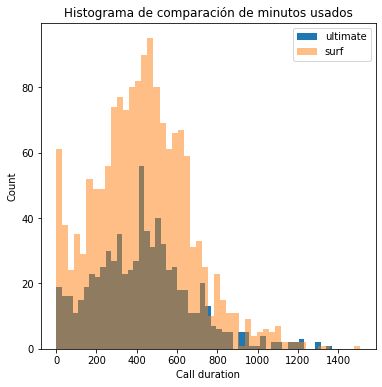

In [61]:
# Histograma de comparación de minutos usados
plt.figure(figsize=(6,6))
plt.hist(ultimate_plan['call_duration'], bins=50, alpha=1, label='ultimate')
plt.hist(surf_plan['call_duration'], bins=50, alpha=0.5, label='surf')

plt.xlabel('Call duration', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de comparación de minutos usados')
plt.legend(loc='upper right');

Como muestra los histogramas de minutos usados en ambos planes, existe una distribución de sesgo positivo que se afirma diciendo que la media de ambas distribuciones es mayor que la mediana.

In [62]:
# # Cálculo de media,varianza y desviación estandar para los mensajes enviados
df_final.groupby('plan_name')['messages_sent'].agg([np.mean, np.var, np.std])

,mean,var,std
plan_name,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


In [63]:
# diferencia en la media mensual de los mensajes 
df_final.groupby('plan_name')['messages_sent'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


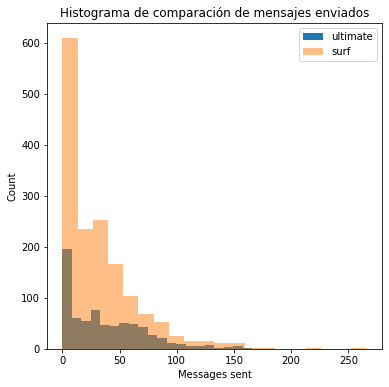

In [64]:
# Histograma de comparación de mensajes enviados
plt.figure(figsize=(6,6))
plt.hist(ultimate_plan['messages_sent'], bins=20, alpha=1, label='ultimate')
plt.hist(surf_plan['messages_sent'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Messages sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de comparación de mensajes enviados')
plt.legend(loc='upper right');

Para la comparación de mensajes enviados de ambos planes, También existe un sesgo positivo.

In [65]:
# # Cálculo de media,varianza y desviación estandar para los Gb consumidos 
df_final.groupby('plan_name')['gb_used'].agg([np.mean, np.var, np.std])

,mean,var,std
plan_name,,,
surf,16.670693,61.58360,7.847522
ultimate,17.306944,58.83055,7.670108


In [66]:
# diferencia en la media de los gb usados
df_final.groupby('plan_name')['gb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,16.670693,7.847522,0.0,12.0,17.0,21.0,70.0
ultimate,720.0,17.306944,7.670108,0.0,13.0,17.0,21.0,46.0


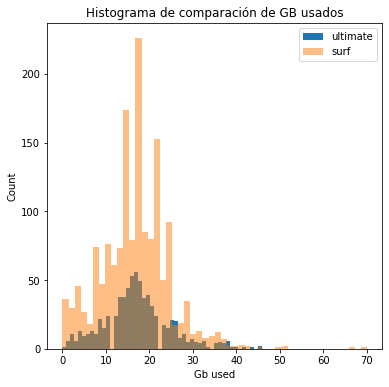

In [67]:
# Histograma de comparación de GB usados
plt.figure(figsize=(6,6))
plt.hist(ultimate_plan['gb_used'], bins=50, alpha=1, label='ultimate')
plt.hist(surf_plan['gb_used'], bins=50, alpha=0.5, label='surf')

plt.xlabel('Gb used', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de comparación de GB usados')
plt.legend(loc='upper right')

Según muestra el histograma de comparación de Gb usados, ambos gráficos muestran una distribución muy cercana a una distribución normal pero el histograma de surf tiene un leve sesgo negativo y el histograma de ultimate un leve sesgo positivo.

In [68]:
evo_plan = df_final.groupby('month').agg({'call_duration':'sum','gb_used':'sum','messages_sent':'sum'})
evo_plan

,call_duration,gb_used,messages_sent
month,,,
April,24651.0,954,1333
August,96360.0,4002,7394
December,220004.0,8578,19071
February,5495.0,231,259
January,1180.0,39,83
July,79645.0,3015,5208
June,59271.0,2227,3833
March,11241.0,533,594
May,42549.0,1576,2780


In [69]:
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November','December']
evo_plan.index = pd.Categorical(evo_plan.index, categories=months, ordered=True)

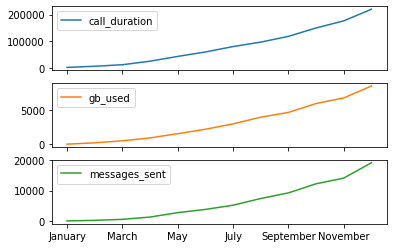

In [70]:
# Evolución del plan en el tiempo
evo_plan = evo_plan.sort_index()
evo_plan.plot(subplots=True);

## Conclusion 

Como conclusiones de esta etapa tenemos que existen mas clientes con plan surf y menos en plan ultimate, Para las llamadas mensuales los clientes de surf requieren más minutos ya que cercano al 40% de ellos sobrepasa los 500 minutos asignados de su plan, No asi los usuarios del plan ultimate quienes en general ni siquiera consumen el total de minutos. Para los mensajes enviados en general los clientes surf no requieren mensajes extras salvo un grupo pequeño que se excede, para los clientes de ultimate en ningún caso requieren de mas mensajes ya que estan muy por debajo del umbral disponible. Para los Gb usados mensualmente observamos que los clientes del plan surf requieren más Gb ya que a lo menos el 50% excede sus Gb disponibles caso contrario de los usuarios de Ultimate ya que en general salvo algunos casos todos estan dentro del paquete. Para finalizar los usuarios con plan surf caen en cobros extras al requerir mas minutos,mensajes y Gb. estos cobros son más elevados que los del plan ultimate lo que demuestra que es el plan que genera mayores ingresos para la compañía.

## Probar las hipótesis

El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
Tú decides qué valor alfa usar.

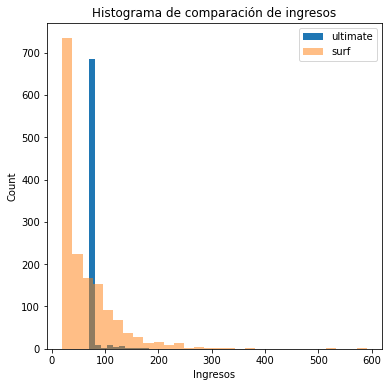

In [71]:
# Histograma de comparación de ingresos
plt.figure(figsize=(6,6))
plt.hist(ultimate_plan['revenue'], bins=10, alpha=1, label='ultimate')
plt.hist(surf_plan['revenue'], bins=30, alpha=0.5, label='surf')

plt.xlabel('Ingresos', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de comparación de ingresos')
plt.legend(loc='upper right');

In [72]:
# Prueba de levene
ultimate = ultimate_plan['revenue']
surf = surf_plan['revenue']

stat, p = levene(ultimate, surf)
p

5.028876110654919e-83

In [73]:
[np.var(x, ddof=1) for x in [ultimate, surf]]

[129.8484855509195, 3067.835152293878]

Según la prueba de levene, el valor de p esta por debajo de las varianzas por ende el equal_var es False.

In [74]:
# prueba de hipótesis
ultimate = ultimate_plan['revenue']
surf = surf_plan['revenue']

# establecer un nivel crítico 
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('El valor de p es: {}'.format(results.pvalue))

# comparar el valor p con el nivel de significancia
if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No se rechazamos la hipótesis nula')

El valor de p es: 3.17039054811355e-15
Rechazamos la hipótesis nula


Formulamos la hipótesis nula afirmando que no hay diferencia entre los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf. Utilizamos un nivel de significación de 0,05. Dado que el valor p es inferior a 0,05, significa que el grupo es diferente, por lo que rechazamos la hipótesis nula. Nuestro análisis sugiere que los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf difieren.

In [75]:
newyork_jersey = new_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # ingreso de ususarios in NY-NJ
not_newyork_jersey = new_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # ingreso de usuarios que no son de  NY-NJ
print('El ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es ${:.2f}'.format(newyork_jersey.mean()))
print('El ingreso promedio de los usuarios de otras regiones es ${:.2f}'.format(not_newyork_jersey.mean()))

El ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es $59.92
El ingreso promedio de los usuarios de otras regiones es $65.22


In [76]:
# Prueba de levene
a = newyork_jersey
b = not_newyork_jersey

stat, p = levene(a, b)
p

0.12580091109612837

In [77]:
[np.var(x, ddof=1) for x in [a, b]]

[1895.5456899204246, 2225.0479943518917]

Según la prueba de levene, el valor de p esta por encima de las varianzas por ende el equal_var es True.

In [78]:
# Prueva de hipotesis 
newyork_jersey = new_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] 
not_newyork_jersey = new_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] 

# nivel de significación estadística
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(newyork_jersey, not_newyork_jersey, equal_var = True)
print('The p-value is: {}'.format(results.pvalue))

# comparar el valor p con el nivel de significancia
if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('Nosotros no rechazamos la hipótesis nula')

The p-value is: 0.04355743162134299
Rechazamos la hipótesis nula


Formulamos nuestra hipótesis nula afirmando que no hay diferencia entre los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey y los usuarios de otras regiones. Usamos una prueba t para probar la hipótesis usando un nivel de significancia de 0.05. Dado que el valor p es inferior a 0,05, significa que el grupo es diferente, por lo que rechazamos la hipótesis nula. Es posible que no sepamos el tamaño de la diferencia entre los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey y los usuarios de otras regiones. Todo lo que la prueba nos dice es que son diferentes. Sin embargo, al calcular el número promedio de ingresos de los usuarios en ambos grupos, podemos decir con certeza que la media de los ingresos entre los dos grupos es significativamente diferente.

## Conclusión final

Los usuarios del plan ultimate tienen más duración de llamadas por mes, envían más mensajes de texto, consumen más volumen de datos que su pares del plan surf, Pero los clientes del plan surf recaen en mayores cobros extras al estar mensualmente excediendo los datos de sus planes.
el ingreso promedio de los usuarios en otras regiones es mayor que el ingreso de los usuarios en el área de Nueva York-Nueva Jersey.
El departamento comercial debe invertir en más anuncios en otras regiones ya que Megaline gana más dinero en esa área que el área de Nueva York-Nueva Jersey.
el plan surf es más rentable que el plan de ultimate,el plan de surf cuenta con 339 clientes mientras que el plan ultimate cuenta con 161.Finalmente podemos afirmar que el plan surf es el plan que genera mas ingresos al tener mayor cantidad de usuario y ser el plan con mayor cantidad de cobros extras.